# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

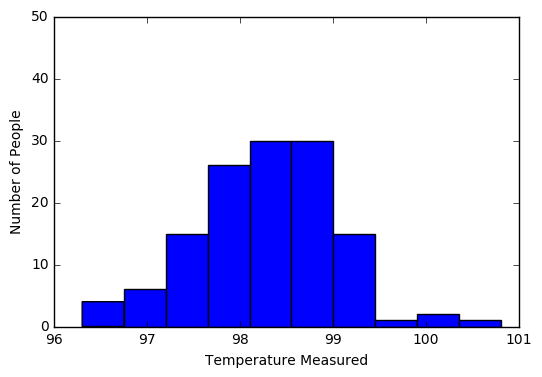

probability of theorhetical temperature is: 0.076923
98.24923076923078 0.733183158039 0.7303577789050377
10.0 120.0
z_score for 98.6 is: 0.478420
z_score of 98.6 with our sample is: 0.478420
t_score probability of 98.6 with our sample is: 0.000000
abnormal tempture 3 standard deviations below the mean would be: 96.049681
abnormal tempture 3 standard deviations below the mean would be: 100.448780


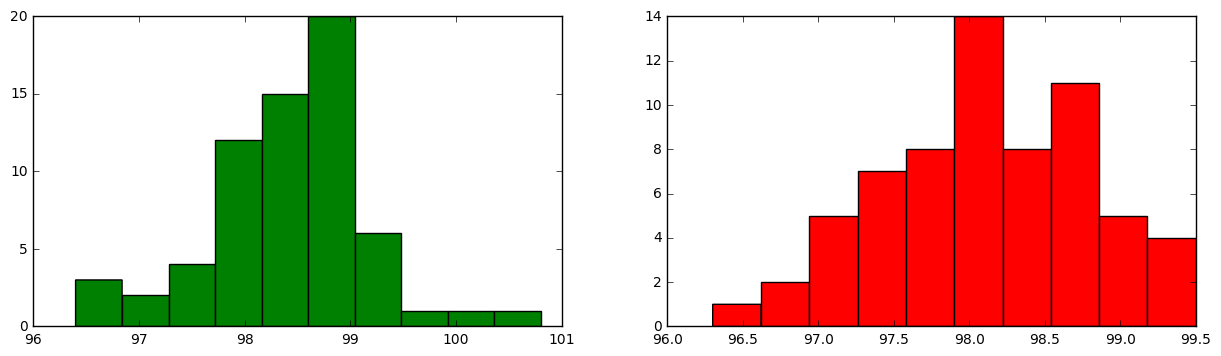

65
-2.30322028919


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('D:\Data Science\Springboard\human_body_temperature.csv')
temperature = df['temperature']
plt.hist(temperature, color = 'blue')
plt.xlabel('Temperature Measured')
plt.ylabel('Number of People')
plt.ylim(0, 50)
plt.show()

total = len(temperature)
perfect = len(temperature[temperature == 98.6])
probability = perfect/total
mean = np.mean(temperature)
sample_sd = np.sqrt((sum([np.power((x-mean), 2) for x in temperature]))/(total - 1))

print('probability of theorhetical temperature is: %f' % probability)
print(np.mean(temperature), sample_sd, np.std(temperature))

proportion_1 = total*probability 
proportion_2 = total*(1-probability)
print(proportion_1, proportion_2)

z_score = (98.6 - mean)/sample_sd
print('z_score for 98.6 is: %f' % (z_score))

p_value_zscore = stats.norm.sf(abs(z_score))*2
print('z_score of 98.6 with our sample is: %f' % (z_score))

t_score = (98.6 - mean)/(sample_sd/np.sqrt(total))
p_value_tscore = stats.norm.sf(abs(t_score))*2
print('t_score probability of 98.6 with our sample is: %f' % (p_value_tscore))

abnormal_temp_low = (-3*sample_sd + mean)
print('abnormal tempture 3 standard deviations below the mean would be: %f' % abnormal_temp_low)

abnormal_temp_high = (3*sample_sd + mean)
print('abnormal tempture 3 standard deviations below the mean would be: %f' % abnormal_temp_high)

#calculating the body temperatures across geneder and plotting a distribution
mask = df['gender'] == 'F'
temperature_female = temperature[mask]
temperature_male = temperature[~mask]
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
axes[0].hist(temperature_female, color = 'green')
axes[1].hist(temperature_male, color = 'red')
plt.show()

total_male = len(temperature_male)
print(total_male)
total_female = len(temperature_female)
combined_mean = np.mean(temperature_male) - np.mean(temperature_female)
combined_std = np.sqrt(np.power(np.std(temperature_male), 2)/total_male + 
                       np.power(np.std(temperature_female), 2)/total_female)
combined_t_score = combined_mean/combined_std
print(combined_t_score)

1. The distribution of temperatures is normally distributed with an sample mean of 98.23 and a sample standard deivation of 0.73. This is 0.47 degrees lower accepted human body temperature. 

2. Our sample size of 130 humans is not large as there are billions of humans on the planet. This satisfies our requirement of having a sample size smaller than 10% of the entire population. However, the sample is large enough as np and nq are both greater than 10 (i.e. 10 and 120 respectively). Moreover, independence is determined by how the sample of 130 humans were collected. Because we don't have that data, we're just going to assume that independence is present as  the samples were randomly collected, thereby removing any factors that may skew the data. 
3. With our sample, there is a 68% probability a body temperature of 98.6 is the true population mean, which indicates that we do not have a significant statistical difference at an alpha of 0.05. This was calculated using a double-sided z-test. Double-sided was chosen because we were in both differences from the mean in general, and not in any particular direction. Moreover, the z-test was chosen because our sample size was greater than 30. The z_test indicated that we have 68% probability of 98.6 being part the true mean of the population. However, with the t-test that probability was 0% indicating statistical significance - this makes sense because the standard deviation in the t-test was reduced by nearly 10 folds, thereby decreasing the range of values included in the temperature distribution.

4. Someone's temperature should be considered abnormal past 3 standard deviations from the mean (99%). This translates to anything above 100.4 or below 96.0 F.

5. I used a double-sided t-test to test the difference between the two sample population means. We found that the t-score for this distribution was 2.30. At an alpha level of 0.05, the threshold for statistical signifiance is ~1.95. Therefore, there is a statistically significant difference between the two popualtions. 
